In [1]:
import os
import numpy as np
from plotly.subplots import make_subplots
from env.utils import load_all_scores, instance_fig
from vns_baselines import VNS_EVRP_KEYS

In [2]:
print("IRL_HGS1 scores:")
irl_hgs_1_df = load_all_scores("logs/dataset_train_data_evrp_wcci_HGS_0.0", range(1, 7), VNS_EVRP_KEYS)
irl_hgs_1_best_score = irl_hgs_1_df.applymap(lambda x: min(x))
irl_hgs_1_overall = irl_hgs_1_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_hgs_1_overall.index = ["Min", "Max", "Mean", "Std."]
irl_hgs_1_overall.T.round(2)

IRL_HGS1 scores:


,Min,Max,Mean,Std.
E-n22-k4.evrp,386.96,386.96,386.96,0.00
E-n23-k3.evrp,581.07,581.07,581.07,0.00
E-n30-k3.evrp,509.47,509.47,509.47,0.00
E-n33-k4.evrp,840.15,840.15,840.15,0.00
E-n51-k5.evrp,529.90,529.90,529.90,0.00
E-n76-k7.evrp,692.64,692.64,692.64,0.00
E-n101-k8.evrp,836.07,839.00,838.51,1.09
X-n143-k7.evrp,15865.19,15880.76,15877.79,5.69
X-n214-k11.evrp,11018.85,11041.02,11026.72,8.19
X-n351-k40.evrp,26280.46,26366.54,26322.43,26.50


In [3]:
print("IRL_HGS2 scores:")
irl_hgs_2_df = load_all_scores("logs/dataset_train_data_evrp_wcci_HGS_0.1", range(1, 21), VNS_EVRP_KEYS)
irl_hgs_2_best_score = irl_hgs_2_df.applymap(lambda x: min(x))
irl_hgs_2_overall = irl_hgs_2_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_hgs_2_overall.index = ["Min", "Max", "Mean", "Std."]
irl_hgs_2_overall.T.round(2)

IRL_HGS2 scores:


,Min,Max,Mean,Std.
E-n22-k4.evrp,386.96,386.96,386.96,0.00
E-n23-k3.evrp,581.07,581.07,581.07,0.00
E-n30-k3.evrp,509.47,509.47,509.47,0.00
E-n33-k4.evrp,840.15,840.15,840.15,0.00
E-n51-k5.evrp,529.90,529.90,529.90,0.00
E-n76-k7.evrp,692.64,692.64,692.64,0.00
E-n101-k8.evrp,839.00,839.00,839.00,0.00
X-n143-k7.evrp,15865.19,15888.99,15878.57,4.99
X-n214-k11.evrp,10991.83,11047.96,11025.60,13.98
X-n351-k40.evrp,26172.75,26382.11,26270.97,42.09


In [4]:
print("IRL_VNS1 scores:")
irl_vns_1_df = load_all_scores("logs/dataset_train_data_evrp_wcci_VNS_0.0", range(1, 7), VNS_EVRP_KEYS)
irl_vns_1_best_score = irl_vns_1_df.applymap(lambda x: min(x))
irl_vns_1_overall = irl_vns_1_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_vns_1_overall.index = ["Min", "Max", "Mean", "Std."]
irl_vns_1_overall.T.round(2)

IRL_VNS1 scores:


,Min,Max,Mean,Std.
E-n22-k4.evrp,384.68,384.68,384.68,0.00
E-n23-k3.evrp,571.95,571.95,571.95,0.00
E-n30-k3.evrp,509.47,509.47,509.47,0.00
E-n33-k4.evrp,840.15,840.15,840.15,0.00
E-n51-k5.evrp,529.90,533.78,531.23,1.81
E-n76-k7.evrp,692.64,692.64,692.64,0.00
E-n101-k8.evrp,834.22,839.00,836.98,1.53
X-n143-k7.evrp,15894.59,16035.07,15935.47,47.99
X-n214-k11.evrp,11199.29,11361.51,11277.73,63.28
X-n351-k40.evrp,26806.12,26862.66,26831.27,21.59


In [5]:
print("IRL_VNS2 scores:")
irl_vns_2_df = load_all_scores("logs/dataset_train_data_evrp_wcci_VNS_0.1", range(1, 21), VNS_EVRP_KEYS)
irl_vns_2_best_score = irl_vns_2_df.applymap(lambda x: min(x))
irl_vns_2_overall = irl_vns_2_best_score.apply(lambda x: [min(x), max(x), np.mean(x), np.std(x)])
irl_vns_2_overall.index = ["Min", "Max", "Mean", "Std."]
irl_vns_2_overall.T.round(2)

IRL_VNS2 scores:


,Min,Max,Mean,Std.
E-n22-k4.evrp,384.68,384.68,384.68,0.00
E-n23-k3.evrp,571.95,571.95,571.95,0.00
E-n30-k3.evrp,509.47,509.47,509.47,0.00
E-n33-k4.evrp,840.15,840.15,840.15,0.00
E-n51-k5.evrp,529.90,543.39,541.60,3.96
E-n76-k7.evrp,692.64,696.27,693.55,1.57
E-n101-k8.evrp,835.39,847.19,841.22,3.50
X-n143-k7.evrp,15883.65,16363.10,16068.34,117.11
X-n214-k11.evrp,11152.30,11427.55,11274.16,67.76
X-n351-k40.evrp,26653.58,26937.11,26792.17,79.07


In [6]:
irl_hgs_1_running_time = irl_hgs_1_df.index.get_level_values("Running Time")[-1]/3600*3
irl_hgs_2_running_time = irl_hgs_2_df.index.get_level_values("Running Time")[-1]/3600*3
irl_vns_1_running_time = irl_vns_1_df.index.get_level_values("Running Time")[-1]/3600*3
irl_vns_2_running_time = irl_vns_2_df.index.get_level_values("Running Time")[-1]/3600*3

print(f"IRL_HGS1 running time = {irl_hgs_1_running_time:.2f}h")
print(f"IRL_HGS2 running time = {irl_hgs_2_running_time:.2f}h")
print(f"IRL_VNS1 running time = {irl_vns_1_running_time:.2f}h")
print(f"IRL_VNS2 running time = {irl_vns_2_running_time:.2f}h")

IRL_HGS1 running time = 2.19h
IRL_HGS2 running time = 2.49h
IRL_VNS1 running time = 6.05h
IRL_VNS2 running time = 4.19h


In [7]:
def show_graphs(algo, lamb, best_scores, key_str="E-"):
    n = 7 if key_str=="E-" else 10
    width = 1200 if key_str=="E-" else 1800
    fig = make_subplots(rows=1, cols=n, horizontal_spacing=0.01)
    os.makedirs(f"graphs/dataset_train_data_evrp_wcci_{algo}_{lamb}", exist_ok=True)
    for i, key in enumerate([x for x in VNS_EVRP_KEYS if key_str in x]):
        plotly_fig, score = instance_fig(best_scores, key)
        plotly_fig.write_image(f"graphs/dataset_train_data_evrp_wcci_{algo}_{lamb}/{key}.pdf")
        title = key.split(".")[0] + f" - {score:.1f}"
        fig.add_traces(plotly_fig.data, rows=i//n+1, cols=i%n+1)
        fig['layout'][f'xaxis{i+1}'].update(title=title)
    fig.update_layout(height=200, width=width)
    fig.update_traces(line_width=1, marker_size=2)
    fig.update_layout(template='plotly_white', margin=dict(l=4, r=4, t=4, b=4, pad=4, autoexpand=True))
    fig.update_xaxes(showgrid=False, showticklabels=False, showline=False, zeroline=False)
    fig.update_yaxes(visible=False)
    fig.update_layout(showlegend=False)
    fig.show("svg")

Small-scale instances:
IRL_HGS1


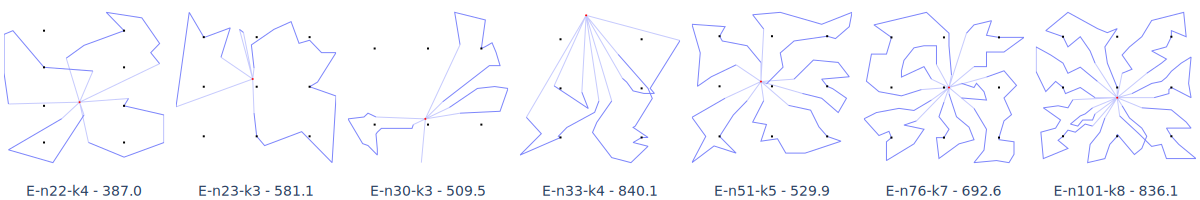

IRL_HGS2


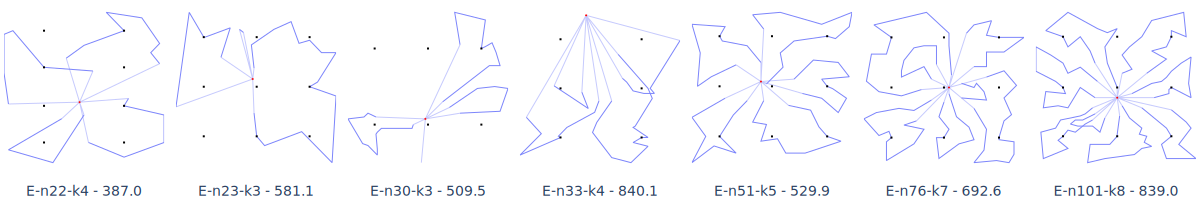

IRL_VNS1


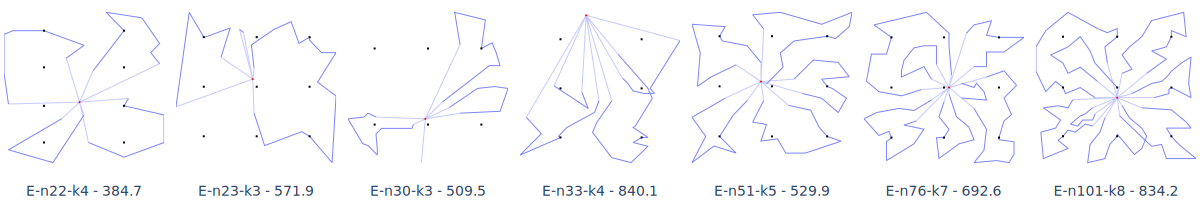

IRL_VNS2


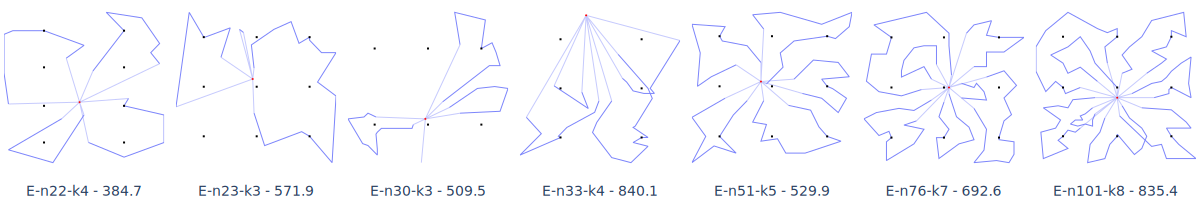

In [8]:
print("Small-scale instances:")
print("IRL_HGS1")
show_graphs("HGS", 0.0, irl_hgs_1_best_score, "E-")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "E-")
print("IRL_VNS1")
show_graphs("VNS", 0.0, irl_vns_1_best_score, "E-")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "E-")

Large-scale instances:
IRL_HGS1


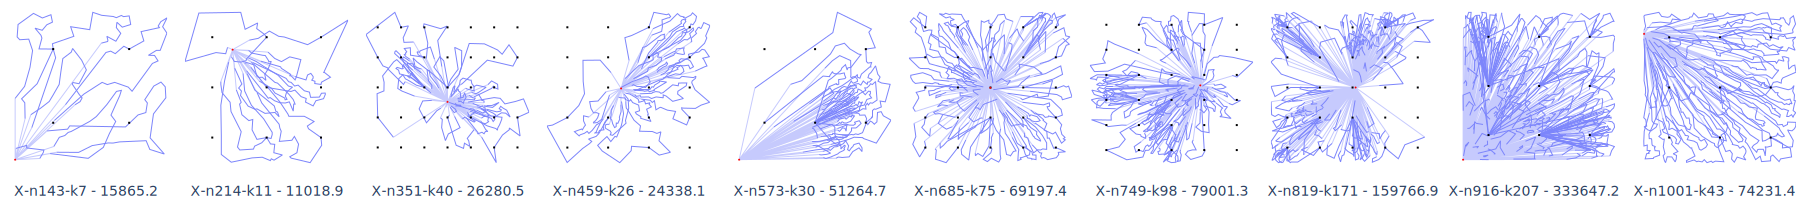

IRL_HGS2


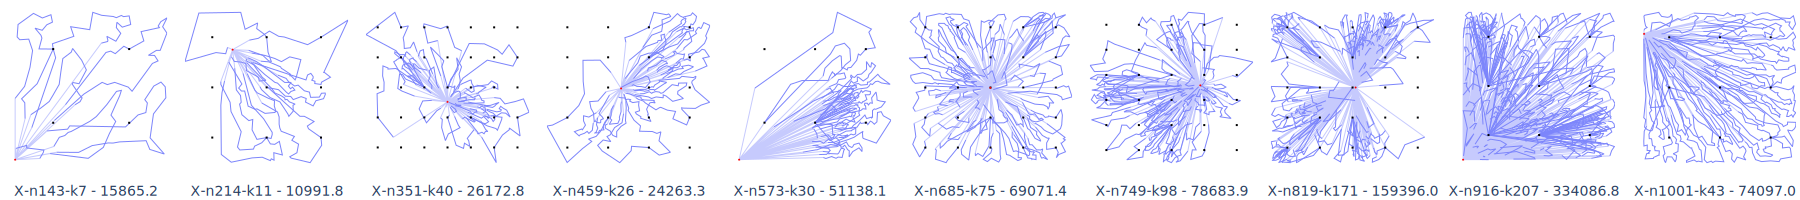

IRL_VNS1


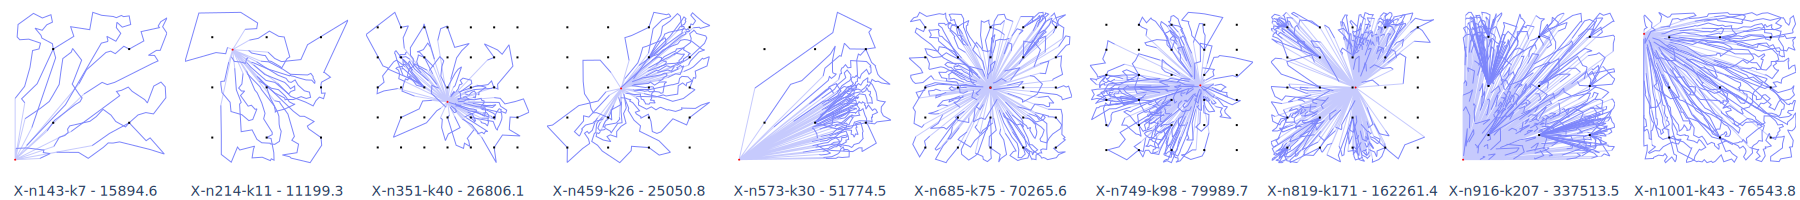

IRL_VNS2


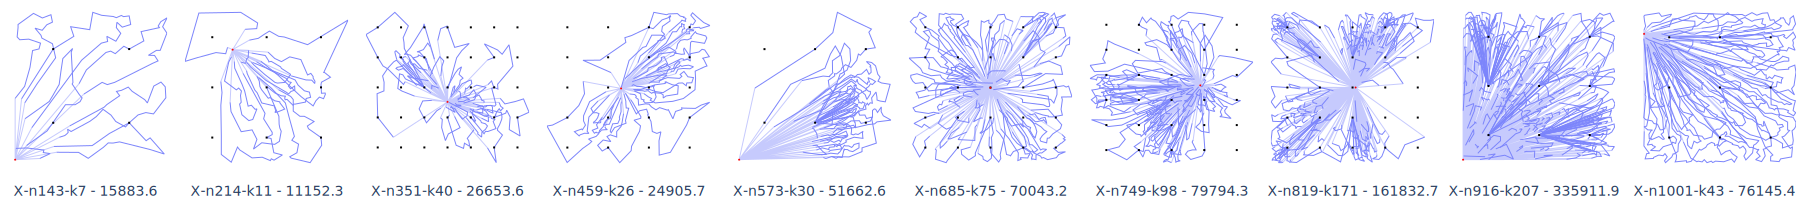

In [9]:
print("Large-scale instances:")
print("IRL_HGS1")
show_graphs("HGS", 0.0, irl_hgs_1_best_score, "X-")
print("IRL_HGS2")
show_graphs("HGS", 0.1, irl_hgs_2_best_score, "X-")
print("IRL_VNS1")
show_graphs("VNS", 0.0, irl_vns_1_best_score, "X-")
print("IRL_VNS2")
show_graphs("VNS", 0.1, irl_vns_2_best_score, "X-")